bitcoin dataset analyze

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
data_sample = pd.read_csv("data_in_sample.csv", index_col=False)
data_sample.head()

,txID,blockID,n_inputs,n_outputs,block_timestamp,n_txs,seq,addrID,sum
0,286344040,501230,3,2,1514360777,2179,1,283256461,244993
1,285318410,500679,1,3,1514028711,2235,0,39848381,202730
2,276973005,497076,1,2,1512155343,2591,0,336365330,1700642
3,281915313,499253,2,2,1513257671,2600,1,65995940,99962500
4,285126052,500594,1,2,1513977525,3065,0,349427300,78098672


In [3]:
data_sample.describe()

,txID,blockID,n_inputs,n_outputs,block_timestamp,n_txs,seq,addrID,sum
count,1.000000e+05,100000.00000,100000.00000,100000.000000,1.000000e+05,100000.00000,100000.000000,1.000000e+05,1.000000e+05
mean,2.823894e+08,499469.25879,85.58321,9.074030,1.513393e+09,2209.69932,42.159660,3.149731e+08,2.930773e+08
std,3.304140e+06,1452.59013,164.78560,33.009524,7.737373e+05,633.23886,97.835571,6.428726e+07,4.664718e+09
min,2.766560e+08,496933.00000,1.00000,1.000000,1.512087e+09,66.00000,0.000000,9.080200e+04,1.000000e+00
25%,2.795632e+08,498232.00000,1.00000,2.000000,1.512738e+09,1877.00000,0.000000,3.196098e+08,6.714868e+05
50%,2.824853e+08,499480.00000,4.00000,2.000000,1.513365e+09,2322.00000,1.000000,3.388005e+08,3.104101e+06
75%,2.854686e+08,500745.00000,81.00000,2.000000,1.514068e+09,2642.00000,28.000000,3.456167e+08,2.517605e+07
max,2.878435e+08,501960.00000,1099.00000,2522.000000,1.514764e+09,4148.00000,1048.000000,3.537039e+08,9.136003e+11


In [4]:
headers = data_sample.columns
headers

Index(['txID', 'blockID', 'n_inputs', 'n_outputs', 'block_timestamp', 'n_txs',
       'seq', 'addrID', 'sum'],
      dtype='object')

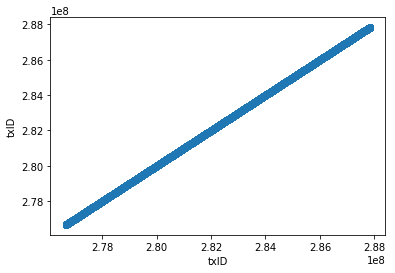

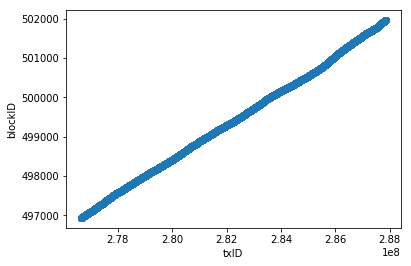

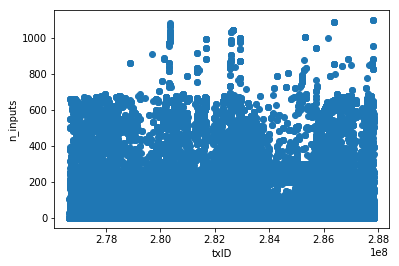

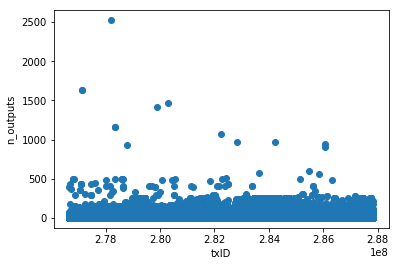

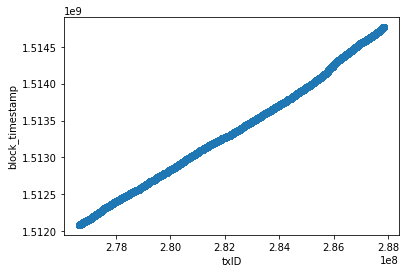

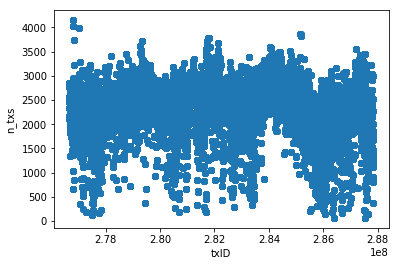

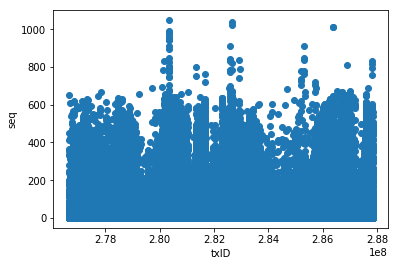

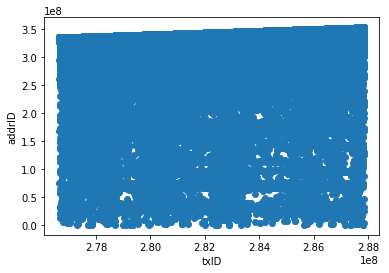

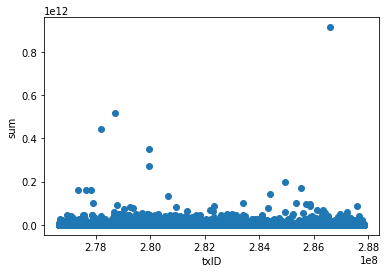

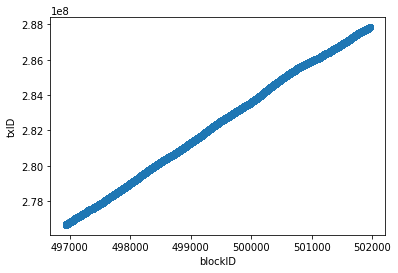

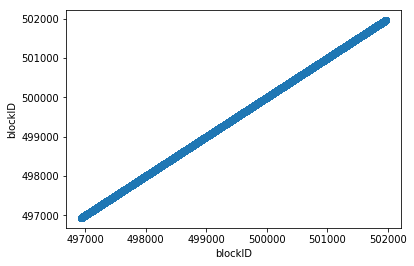

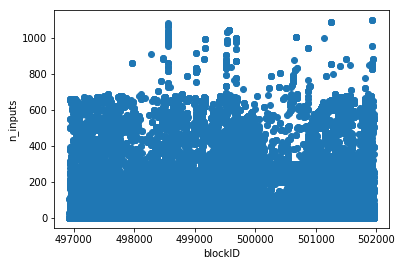

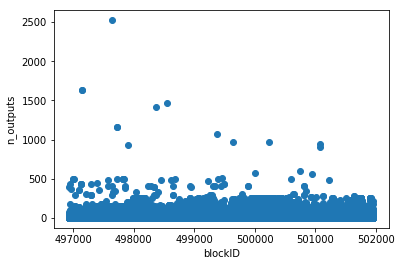

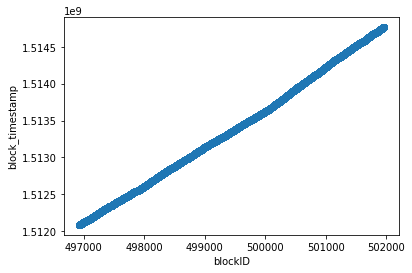

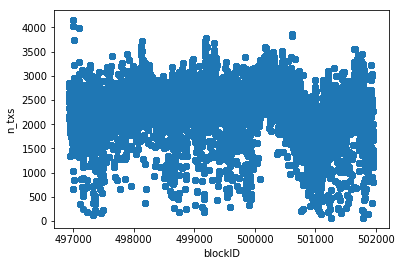

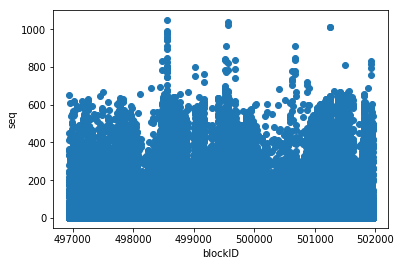

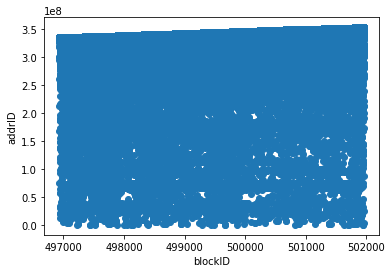

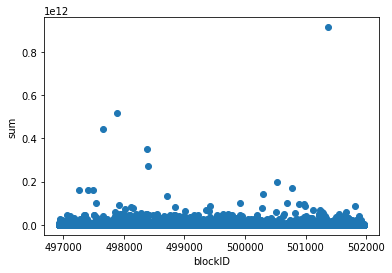

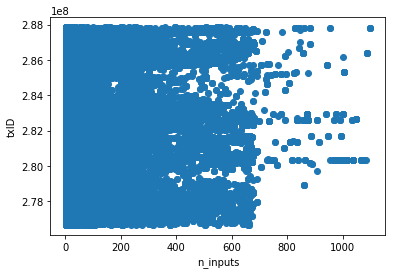

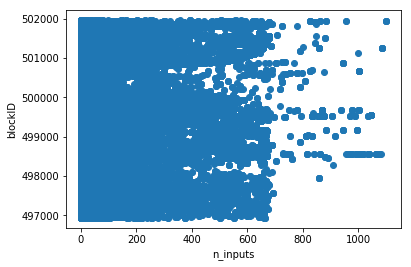

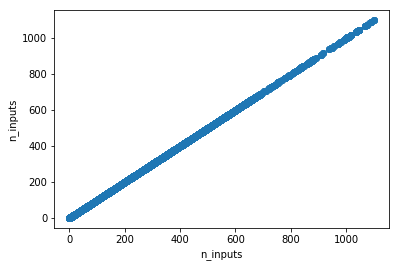

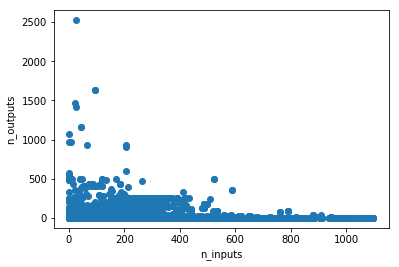

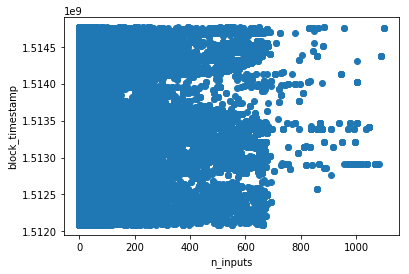

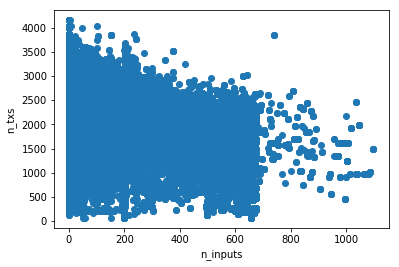

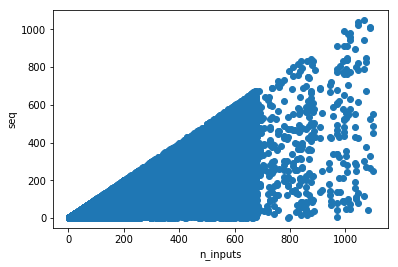

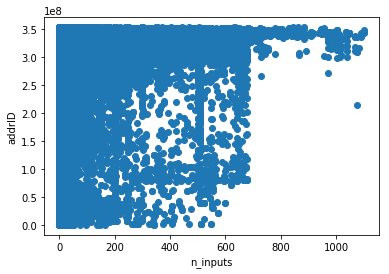

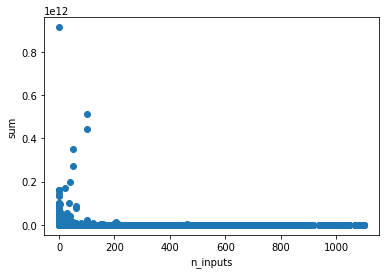

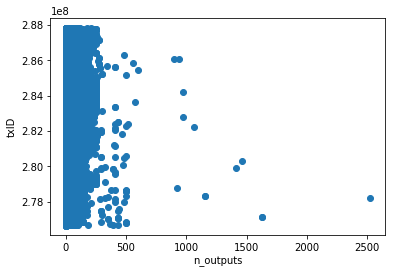

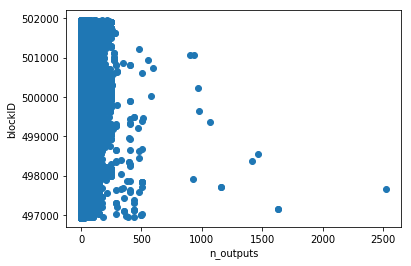

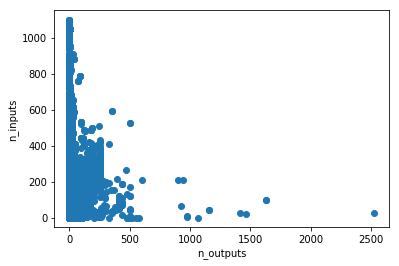

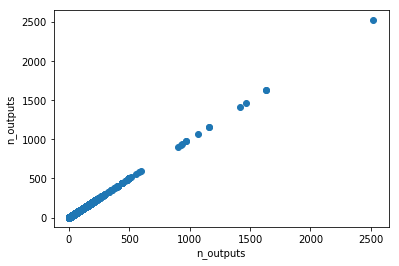

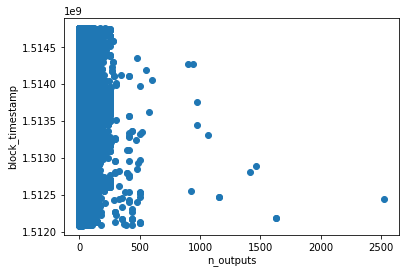

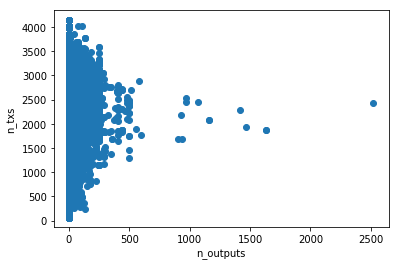

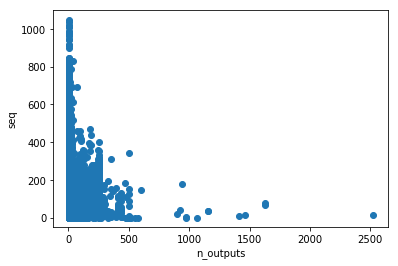

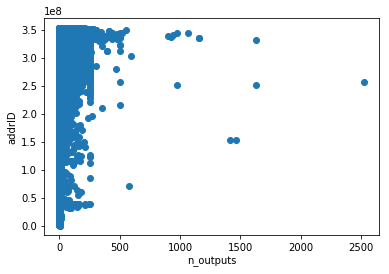

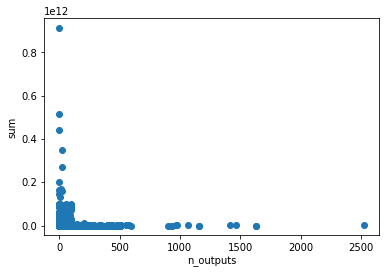

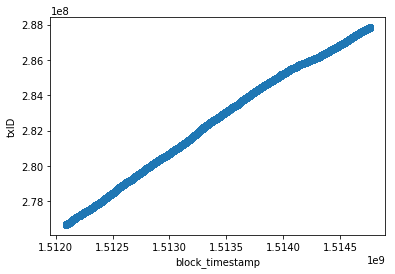

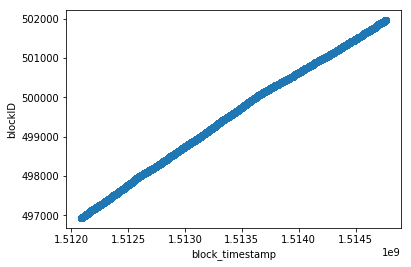

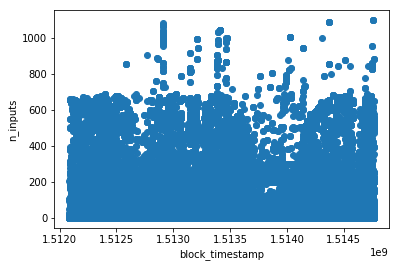

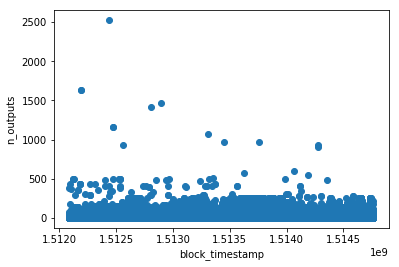

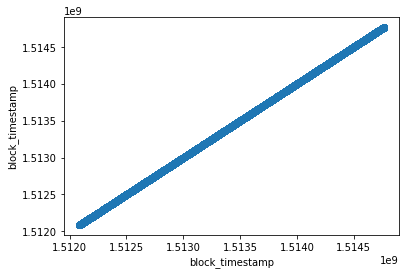

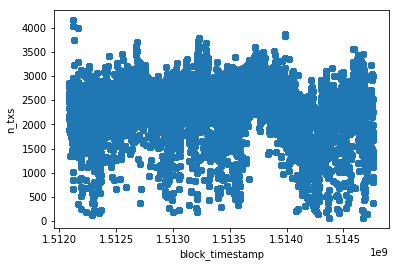

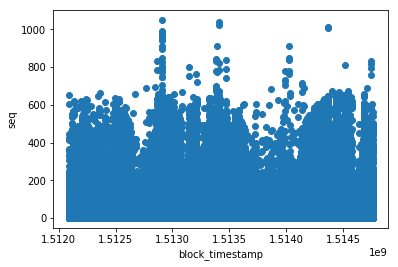

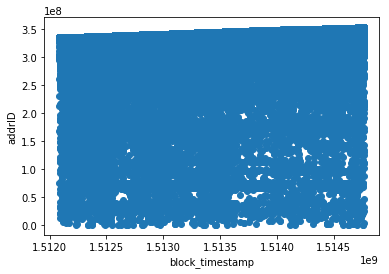

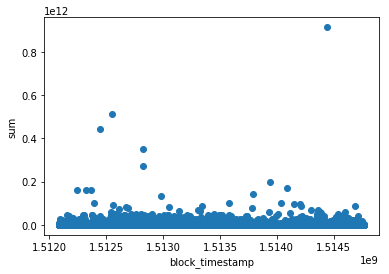

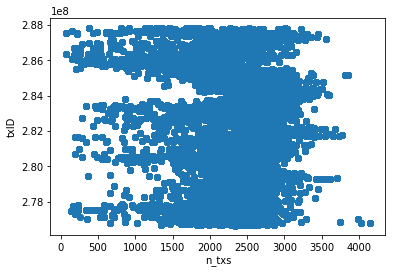

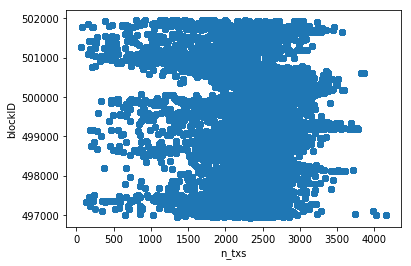

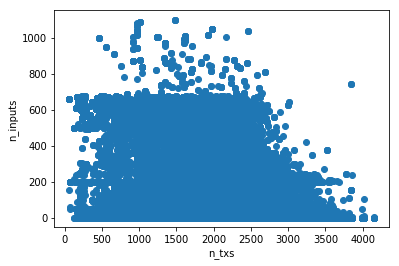

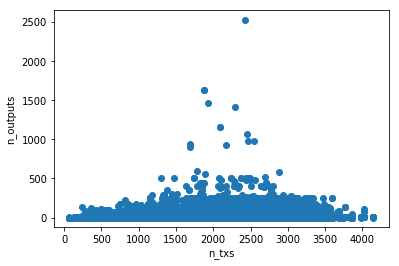

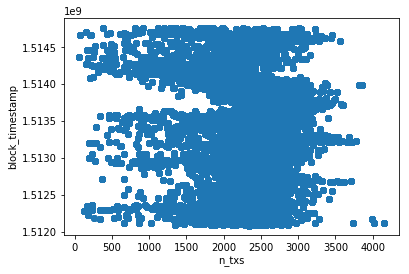

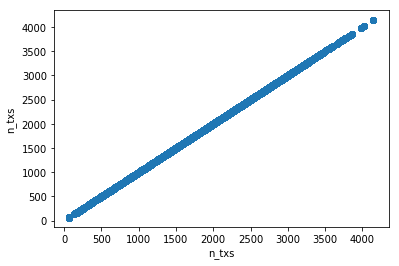

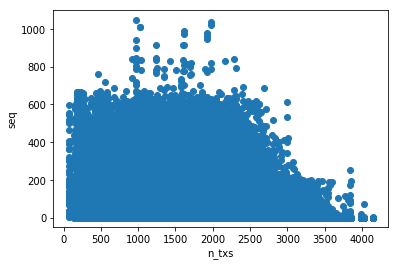

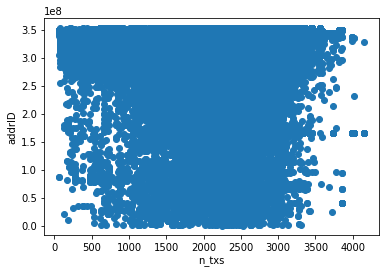

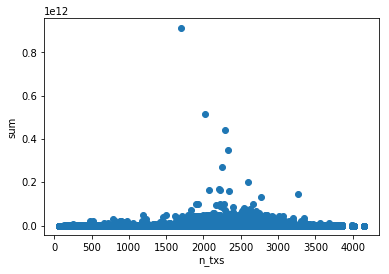

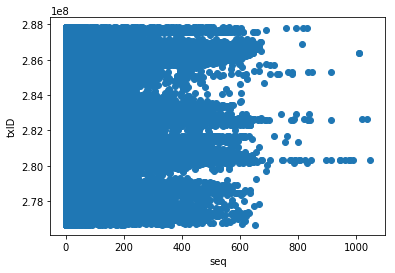

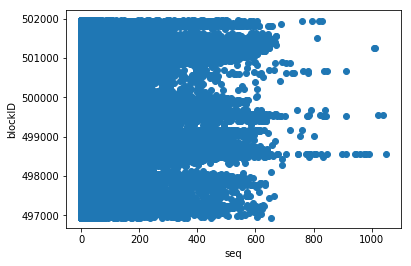

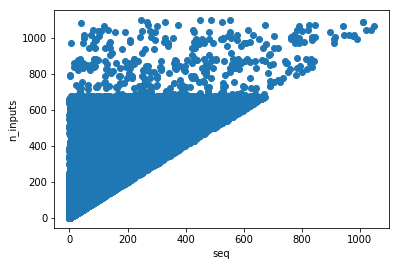

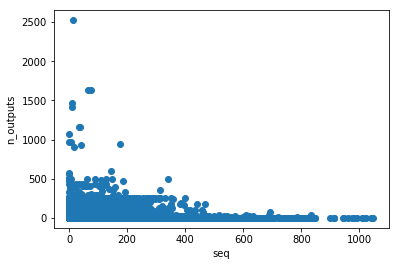

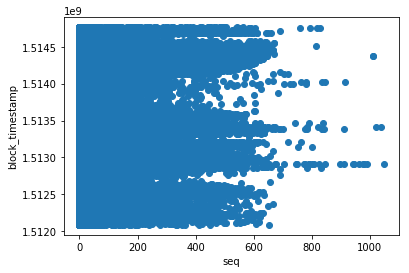

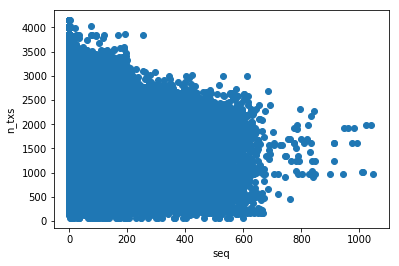

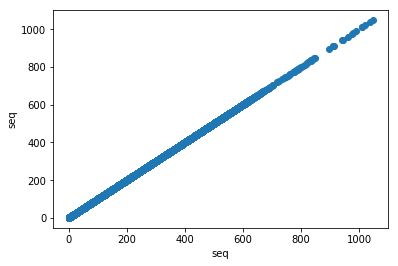

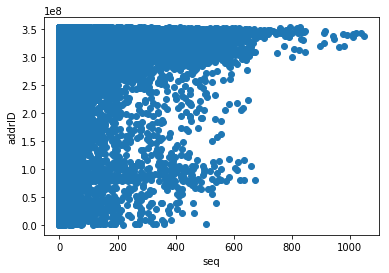

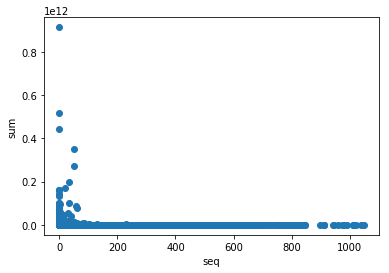

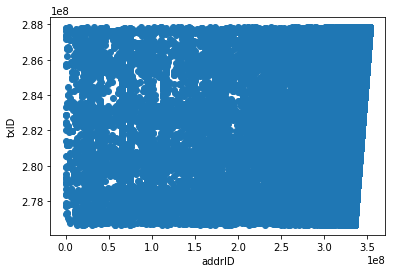

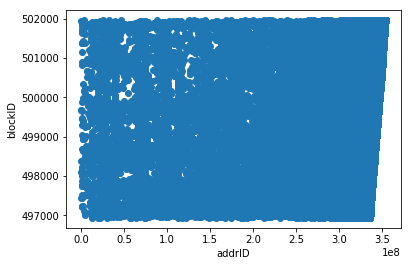

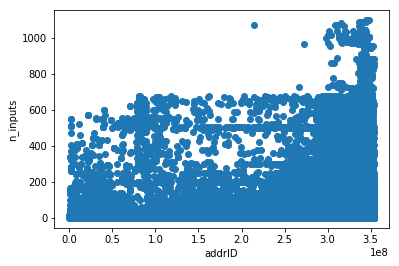

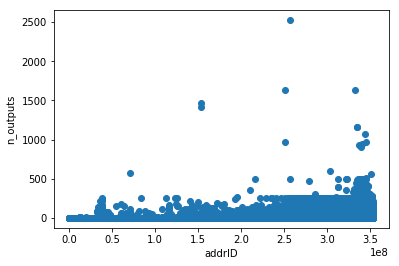

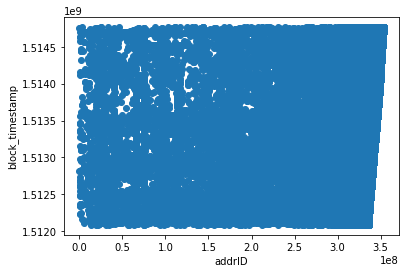

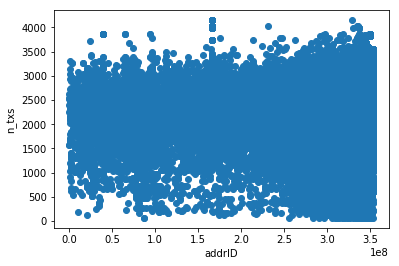

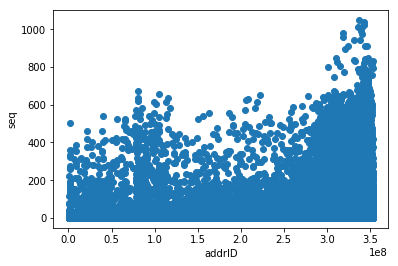

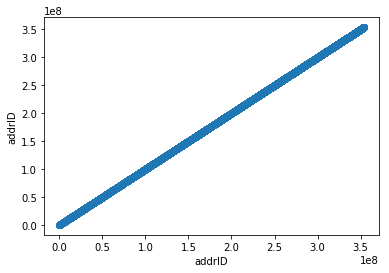

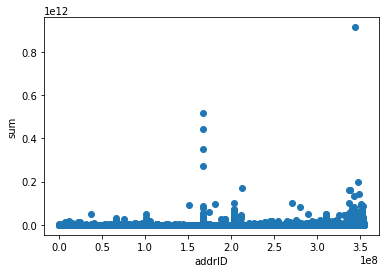

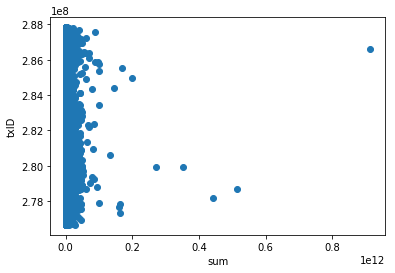

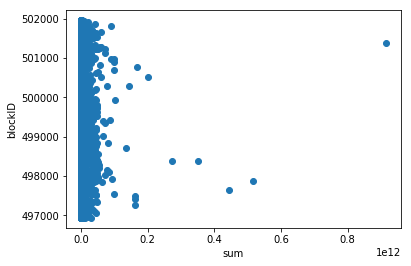

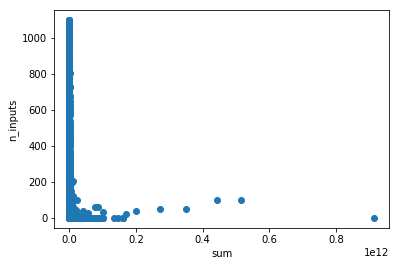

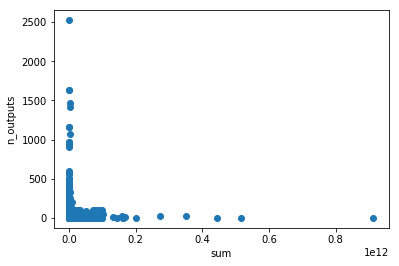

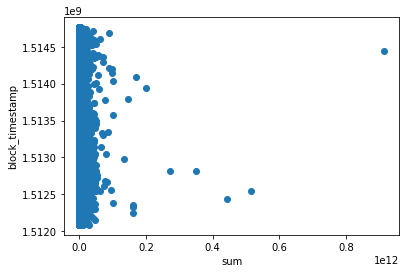

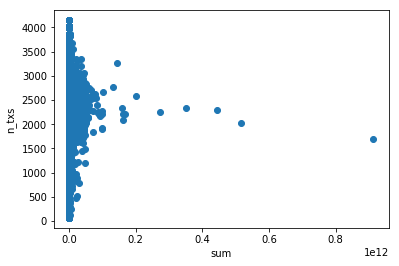

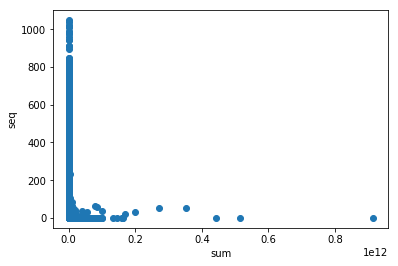

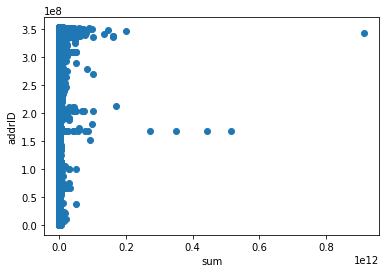

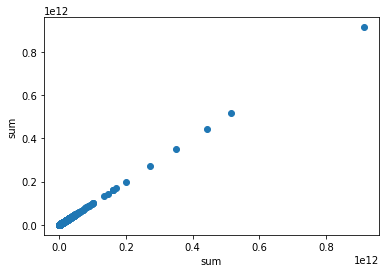

In [8]:
for header in headers:
    for header2 in headers:
        plt.scatter(data_sample[header].tolist(), data_sample[header2].tolist())
        plt.xlabel(header)
        plt.ylabel(header2)
        plt.show()


In [6]:
data_sample.describe()

,txID,blockID,n_inputs,n_outputs,block_timestamp,n_txs,seq,addrID,sum
count,1.000000e+05,100000.00000,100000.00000,100000.000000,1.000000e+05,100000.00000,100000.000000,1.000000e+05,1.000000e+05
mean,2.823894e+08,499469.25879,85.58321,9.074030,1.513393e+09,2209.69932,42.159660,3.149731e+08,2.930773e+08
std,3.304140e+06,1452.59013,164.78560,33.009524,7.737373e+05,633.23886,97.835571,6.428726e+07,4.664718e+09
min,2.766560e+08,496933.00000,1.00000,1.000000,1.512087e+09,66.00000,0.000000,9.080200e+04,1.000000e+00
25%,2.795632e+08,498232.00000,1.00000,2.000000,1.512738e+09,1877.00000,0.000000,3.196098e+08,6.714868e+05
50%,2.824853e+08,499480.00000,4.00000,2.000000,1.513365e+09,2322.00000,1.000000,3.388005e+08,3.104101e+06
75%,2.854686e+08,500745.00000,81.00000,2.000000,1.514068e+09,2642.00000,28.000000,3.456167e+08,2.517605e+07
max,2.878435e+08,501960.00000,1099.00000,2522.000000,1.514764e+09,4148.00000,1048.000000,3.537039e+08,9.136003e+11
